In [41]:
import pandas as pd

df = pd.read_csv('sample.csv')

In [42]:
df

,name,start,end,budget
0,Kinder,2024-01-01,2025-06-30,20000
1,TAP,2026-01-01,2028-06-30,30000
2,web,2025-01-01,2035-10-30,1000
3,p2,2024-09-01,2026-10-30,9400
4,p3,2028-01-01,2029-10-30,9400


In [43]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])
df = df.sort_values(by=['start'])
start_budget_map = df.groupby("start")["budget"].sum().to_dict()
end_budget_map = df.groupby("end")["budget"].sum().to_dict()
edges = sorted(set(df['start']).union(set(df['end'])))

values = []
sum = 0
for edge in edges:
    if edge in start_budget_map:
        sum += start_budget_map[edge]
    if edge in end_budget_map:
        sum -= end_budget_map[edge]
    values.append(sum)
values.pop()


0

/tmp/ipykernel_37299/1830753513.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


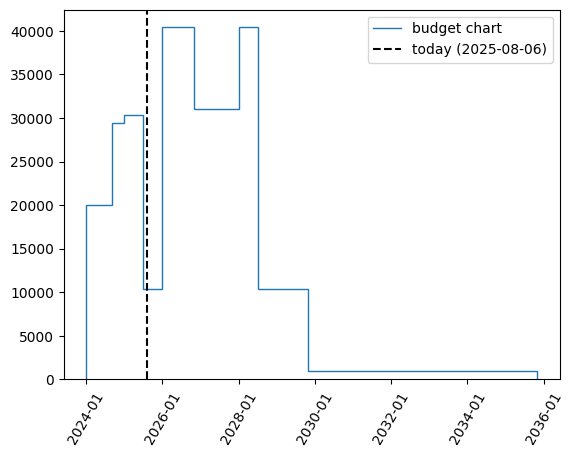

In [44]:
# Generate a step chart using the x and heights1 variables
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

fig, ax = plt.subplots()
now = datetime.now()

ax.stairs(values, edges, label="budget chart", color="tab:blue")
ax.axvline(
    x=now,
    color="black",
    label=f"today ({now.strftime('%Y-%m-%d')})",
    linestyle="dashed",
)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=60)
ax.legend()
fig.show()

In [45]:
import pandas as pd

df = pd.read_csv('sample2.csv')
df

,staff,monthly-rate,start,end
0,bidar,600,2024-01-01,2026-01-30
1,ali,700,2025-09-01,2026-01-30
2,karim,200,2026-10-02,2027-09-30
3,hamid,1000,2027-06-02,2028-09-30


In [46]:
df["start"] = pd.to_datetime(df["start"])
df["end"] = pd.to_datetime(df["end"])
df = df.sort_values(by=["start"])
df["total-effect"] = df["monthly-rate"] * (df["end"] - df["start"]).dt.days / 30

start_rate_map = df.groupby("start")["monthly-rate"].sum().to_dict()
end_rate_map = df.groupby("end")["monthly-rate"].sum().to_dict()
end_drop_map = df.groupby("end")["total-effect"].sum().to_dict()

edges = sorted(set(df["start"]).union(set(df["end"])))

values = []
timestamps = []
sum = 0
rate = 0
previous_edge = edges[0]
for edge in edges:
    duration = (edge - previous_edge).days / 30
    sum += rate * duration
    values.append(sum)
    timestamps.append(edge)

    if edge in end_rate_map:
        # the amount of sum that decreases when a staff exits from project
        sum -= end_drop_map[edge]
        values.append(sum)
        timestamps.append(edge)
        rate -= end_rate_map[edge]

    if edge in start_rate_map:
        rate += start_rate_map[edge]

    previous_edge = edge


/tmp/ipykernel_37299/1555761794.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


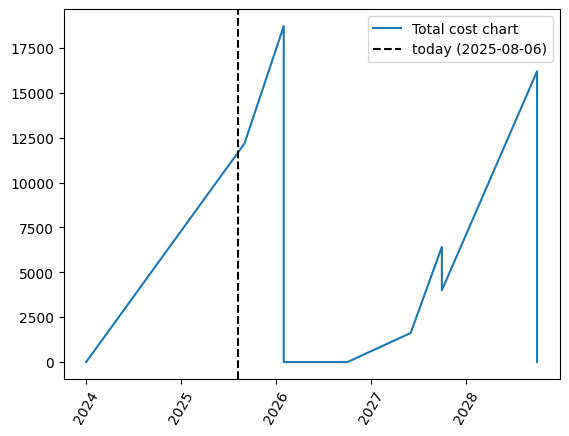

In [47]:
fig, ax = plt.subplots()

ax.plot(timestamps, values, label="Total cost chart" )
ax.axvline(
    x=now,
    color="black",
    label=f"today ({now.strftime('%Y-%m-%d')})",
    linestyle="dashed",
)
plt.xticks(rotation=60)
ax.legend()
fig.show()